In [17]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [18]:
path = './Copy of NGAsub_MegaFlatfile_RotD50_050_R211022.xlsx'
df = pd.read_excel(path)

In [19]:
df.head()

,NGAsubRSN,DatabaseRegion,NGAsubEQID,NGAsubSSN,Earthquake_Name,YEAR,MODY,HRMN,Earthquake_Magnitude,Hypocenter_Latitude_deg,...,T8.5S,T9S,T9.5S,T10S,T11S,T12S,T13S,T14S,T15S,T20S
0,1000001,Alaska,1000001,1000001,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.6928,...,0.000082,0.000095,0.000103,0.000125,0.000138,0.000109,0.000089,0.000064,0.000053,0.000061
1,1000002,Alaska,1000001,1000002,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.6928,...,0.000415,0.000395,0.000405,0.000390,0.000336,0.000332,0.000263,0.000215,0.000187,0.000119
2,1000003,Alaska,1000001,1000003,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.6928,...,0.000092,0.000083,0.000086,0.000082,0.000091,0.000078,0.000071,0.000066,0.000060,0.000055
3,1000004,Alaska,1000001,1000004,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.6928,...,0.000055,0.000053,0.000051,0.000055,0.000059,0.000058,0.000042,0.000035,0.000038,0.000028
4,1000005,Alaska,1000001,1000005,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.6928,...,0.000129,0.000116,0.000128,0.000122,0.000130,0.000119,0.000096,0.000135,0.000162,0.000060


In [20]:
df.shape

(71340, 227)

In [21]:
# removing the rows with blank data
df.drop(index = df[df.iloc[:,8] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,11] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,46] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,72] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,114] == -999].index, inplace=True)
df.shape

(65562, 227)

In [22]:
# Cleaning data by dropping rows according to guidlines given in the document
df.drop(index = df[df.iloc[:, 61] != 2].index, inplace=True)
df.drop(index = df[df.iloc[:, 113] > 10].index, inplace=True)
df.drop(index = df[df.iloc[:, 39] == 1].index, inplace=True)
df.drop(index = df[df.iloc[:, 47] > 1000].index, inplace=True)
df.drop(index = df[df.iloc[:,70] > 2].index, inplace=True)
df.drop(index = df[(df.iloc[:,17] == 0) & (df.iloc[:, 11] > 40)].index, inplace=True)
df.drop(index = df[(df.iloc[:,17] == 1) & (df.iloc[:,11] > 200)].index, inplace=True)
df.drop(index = df[df.iloc[:, 41] > 4].index, inplace=True)
df.drop(index = df[df.iloc[:, 19] == 1].index, inplace=True)



In [49]:
# POINT 10 (source review flag)
df = df[df.iloc[:, 23] != -1]

# Interface and intraslab flags (only 0 and 1)
df.drop(index = df[df.iloc[:, 17] == 2].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == 3].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == 4].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -444].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -666].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -777].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -888].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -999].index, inplace=True)

outliers = df["Rjb_km"][df["Rjb_km"] < 2].index
df.drop(index=outliers, inplace=True)


In [24]:
des_stats = pd.DataFrame(columns=['param','min', 'max', 'mean', 'median', 'STD', 'skew', 'kurtosis'])

In [25]:
def find_stats(column):
    min_values = df[column].min()
    max_values = df[column].max()
    mean_values = df[column].mean()
    median_values = df[column].median()
    std_dev_values = df[column].std()
    skewness_values = df[column].skew()
    kurtosis_values = df[column].kurtosis()

    des_stats.loc[len(des_stats)] = [column, min_values, max_values, mean_values, median_values, std_dev_values, skewness_values, kurtosis_values]
    

In [26]:
for col_name in ["PGA_g", "PGV_cm_sec", "PGD_cm"]:
    find_stats(col_name)

In [27]:
des_stats

,param,min,max,mean,median,STD,skew,kurtosis
0,PGA_g,2.707700e-07,1.1342,0.019916,0.007333,0.060550,9.057086,104.788971
1,PGV_cm_sec,5.858900e-05,66.4040,0.964028,0.323315,2.654208,9.617446,143.506955
2,PGD_cm,5.248200e-06,19.2440,0.148326,0.031159,0.630249,16.910782,388.912286


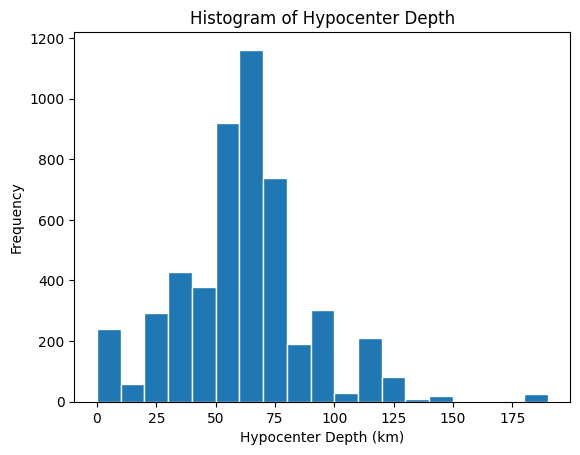

In [67]:
plt.hist(df['Hypocenter_Depth_km'], bins=range(0, int(max(df['Hypocenter_Depth_km'])) + 10, 10), edgecolor="white")

plt.xlabel('Hypocenter Depth (km)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Hypocenter Depth')

plt.show()

### Interpretation
The frequency increases to a maximum and decreases as we move away from the hypocenter

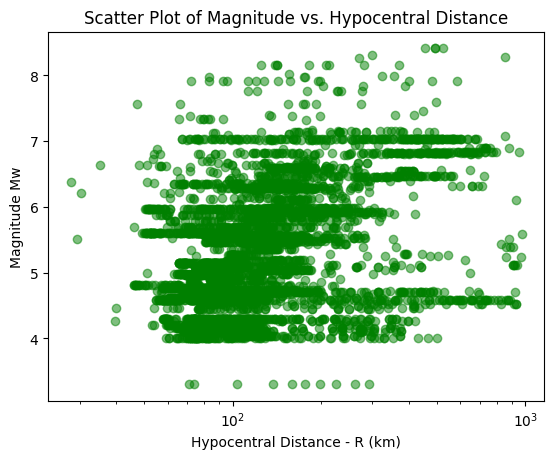

In [68]:
plt.scatter(df['HypD_km'], df['Earthquake_Magnitude'], color='green', alpha=0.5)

plt.xlabel('Hypocentral Distance - R (km)')
plt.ylabel('Magnitude Mw')

plt.xscale('log')
plt.title('Scatter Plot of Magnitude vs. Hypocentral Distance')

plt.show()

### Interpretation
No clear pattern is seen, however, the magnitude marginally increases as the hypocentral distance increases

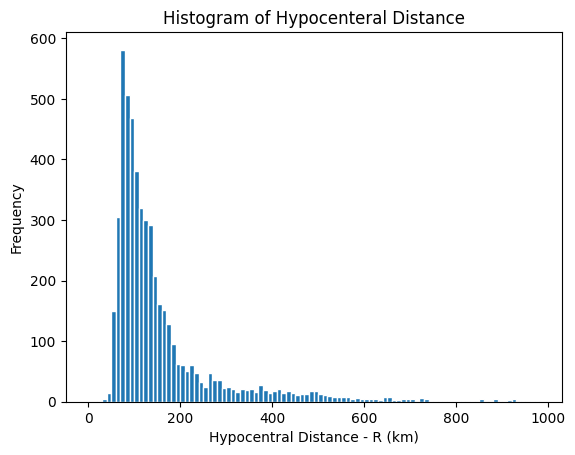

In [69]:
plt.hist(df['HypD_km'], bins=range(0, int(max(df['HypD_km'])) + 10, 10), edgecolor="white")

plt.xlabel('Hypocentral Distance - R (km)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Hypocenteral Distance')

plt.show()

### Interpretation
The frequency shoots to a maximum soon as we move from the hypocentral distance before decreasing gradually

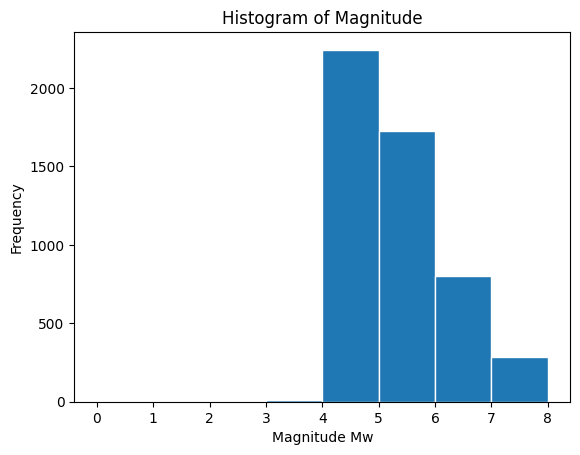

In [70]:
plt.hist(df['Earthquake_Magnitude'], bins=range(0, int(max(df['Earthquake_Magnitude'])) + 1, 1), edgecolor="white")

plt.xlabel('Magnitude Mw')
plt.ylabel('Frequency')
plt.title(f'Histogram of Magnitude')

plt.show()

### Interpretation
The frequency increases to a maximum from magnitude 3 to 4 before decreasing gradually

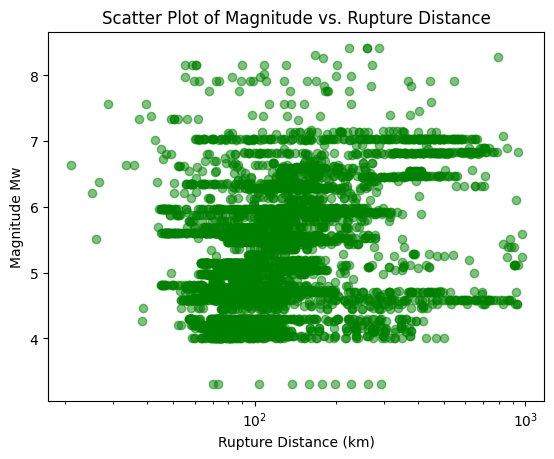

In [71]:
plt.scatter(df['ClstD_km'], df['Earthquake_Magnitude'], color='green', alpha=0.5)

plt.xlabel('Rupture Distance (km)')
plt.ylabel('Magnitude Mw')

plt.xscale('log')
plt.title('Scatter Plot of Magnitude vs. Rupture Distance')

plt.show()

### Interpretation
The interpretation is same as that of hypocentral distance

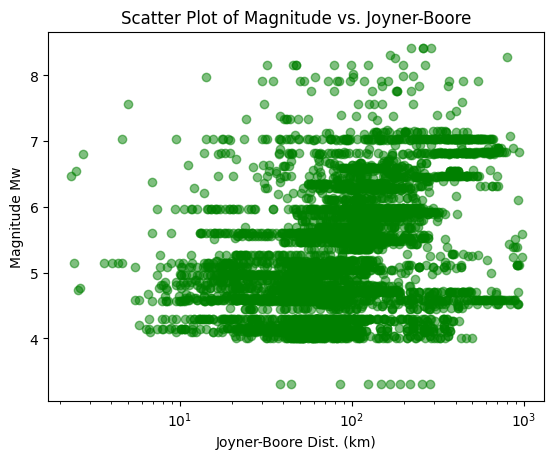

In [72]:
plt.scatter(df['Rjb_km'], df['Earthquake_Magnitude'], color='green', alpha=0.5)

plt.xlabel('Joyner-Boore Dist. (km)')
plt.ylabel('Magnitude Mw')

plt.xscale('log')
plt.title('Scatter Plot of Magnitude vs. Joyner-Boore')

plt.show()

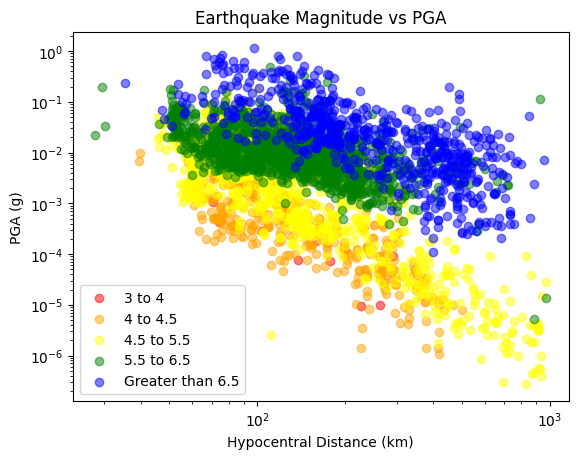

In [73]:
conditions = [
    (df['Earthquake_Magnitude'] >= 3) & (df['Earthquake_Magnitude'] < 4),
    (df['Earthquake_Magnitude'] >= 4) & (df['Earthquake_Magnitude'] < 4.5),
    (df['Earthquake_Magnitude'] >= 4.5) & (df['Earthquake_Magnitude'] < 5.5),
    (df['Earthquake_Magnitude'] >= 5.5) & (df['Earthquake_Magnitude'] < 6.5),
    (df['Earthquake_Magnitude'] >= 6.5)
]

plt.figure()

for i, (condition, color, label) in enumerate(zip(conditions, ['red', 'orange', 'yellow', 'green', 'blue'], ['3 to 4', '4 to 4.5', '4.5 to 5.5', '5.5 to 6.5', 'Greater than 6.5'])):
    subset = df[condition]
    plt.scatter(subset['HypD_km'], subset['PGA_g'], color=color, alpha=0.5, label=label)

plt.xlabel('Hypocentral Distance (km)')
plt.ylabel('PGA (g)')
plt.title('Earthquake Magnitude vs PGA')

plt.legend(loc='lower left')

plt.yscale('log')
plt.xscale('log')

plt.show()

### Interpretation
The peak ground acceleration decreases with hypocentral distance in a linear fashion

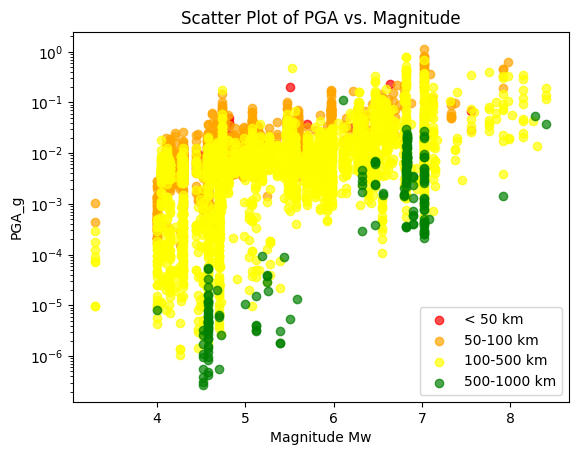

In [74]:
# scatter plot PGA vs Magnitude Mw 
conditions = [
    (df['HypD_km'] < 50),
    (df['HypD_km'] >= 50) & (df['HypD_km'] < 100),
    (df['HypD_km'] >= 100) & (df['HypD_km'] < 500),
    (df['HypD_km'] >= 500) & (df['HypD_km'] < 1000)
]

for condition, color, label in zip(conditions, ['red', 'orange', 'yellow', 'green'], ['< 50 km', '50-100 km', '100-500 km', '500-1000 km']):
    subset = df[condition]
    plt.scatter(subset['Earthquake_Magnitude'], subset['PGA_g'], color=color, alpha=0.7, label=label)

# Set labels and title
plt.xlabel('Magnitude Mw')
plt.ylabel('PGA_g')
plt.yscale('log')
plt.title('Scatter Plot of PGA vs. Magnitude')

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


### Interpretation
The peak ground acceleration increases with magnitude

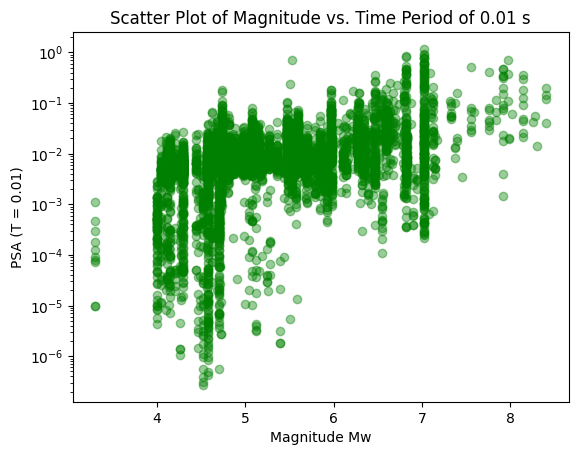

In [81]:
plt.scatter(df['Earthquake_Magnitude'], psa_sub_final[:,1], color='green', alpha=0.4)

plt.ylabel('PSA (T = 0.01)')
plt.xlabel('Magnitude Mw')
plt.yscale('log')
plt.title('Scatter Plot of Magnitude vs. Time Period of 0.01 s')

plt.show()

### Interpretation
No clear trend but the prominence of lower valued PSA decreases with increase in magnitude

In [75]:
# Interpolating
period = [0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.12, 0.15, 0.17, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1, 2, 3, 4]
psa_sub = df.iloc[:, 116:226].astype(float)

T = df.columns[116:226].to_numpy()
for i in range(len(T)):
    T[i] = T[i].replace('S', '').replace('T', '').replace('pt', '.')

T = T.astype(np.float64)

In [76]:
num_data = psa_sub.shape[0]
psa_sub_final = np.zeros((num_data, len(period)), dtype = np.float64)

for i in range(num_data):
    psa_sub_final[i, :] = np.interp(period, T, psa_sub.iloc[i, :])

In [78]:
psa_stats = pd.DataFrame(columns=['param','min', 'max', 'mean', 'median', 'STD', 'skew', 'kurtosis'])

def find_psa_stats(column):
    min_values = psa_sub_final[column].min()
    max_values = psa_sub_final[column].max()
    mean_values = psa_sub_final[column].mean()
    median_values = np.median(psa_sub_final[column])
    std_dev_values = psa_sub_final[column].std()
    skewness_values = skew(psa_sub_final[column])
    kurtosis_values = kurtosis(psa_sub_final[column])

    psa_stats.loc[len(psa_stats)] = [period[column], min_values, max_values, mean_values, median_values, std_dev_values, skewness_values, kurtosis_values]
    

In [79]:
for i in range(len(period)):
    find_psa_stats(i)

In [80]:
psa_stats

,param,min,max,mean,median,STD,skew,kurtosis
0,0.010,1.678593e-04,0.003299,0.001600,0.001510,0.000759,0.325566,-0.304664
1,0.020,2.339687e-06,0.000166,0.000077,0.000074,0.000045,0.313726,-0.422857
2,0.030,2.379518e-06,0.000334,0.000138,0.000100,0.000103,0.378705,-1.127503
3,0.040,2.268546e-05,0.003496,0.001676,0.001560,0.001015,-0.073076,-1.088270
4,0.050,1.081578e-06,0.000078,0.000034,0.000037,0.000020,0.144026,-0.525950
5,0.075,4.079928e-05,0.007029,0.002739,0.002165,0.001814,0.529071,-0.221291
6,0.100,5.538941e-06,0.000087,0.000049,0.000049,0.000024,0.112459,-1.206148
7,0.120,5.607335e-06,0.000644,0.000172,0.000133,0.000134,2.083409,5.111789
8,0.150,4.842591e-05,0.004547,0.002222,0.002285,0.001273,-0.098532,-0.932080
9,0.170,1.523462e-04,0.181028,0.043767,0.035071,0.043551,1.547002,2.514791
